## **Libraries**

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

## **Problem 3.**

El famoso polímata italiano Leonardo da Vinci (1452-1519) propuso en sus estudios anatómicos que existe una proporción particular en el cuerpo humano: la distancia entre los brazos extendidos horizontalmente (formando una “T” con el cuerpo) es aproximadamente igual a la estatura de la persona. Para verificar esta hipótesis, utilizaremos datos de 1500 estudiantes del Census at school que usaron en el primer proyecto.

### *Data reading*

In [4]:
df_3 = pd.read_csv('../data/merged_data.csv')
df_3

,Height_cm,Armspan_cm
0,178,186
1,158,152
2,174,174
3,176,183
4,160,66
...,...,...
1495,167,171
1496,193,197
1497,66,54
1498,152,61


### *a. Realice un diagrama de dispersión (scatter plot) para visualizar la relación entre la distancia entre brazos extendidos (eje x) y la estatura (eje y). Utilice la misma escala en ambos ejes. ¿Qué tipo de relación observa entre estas variables?*

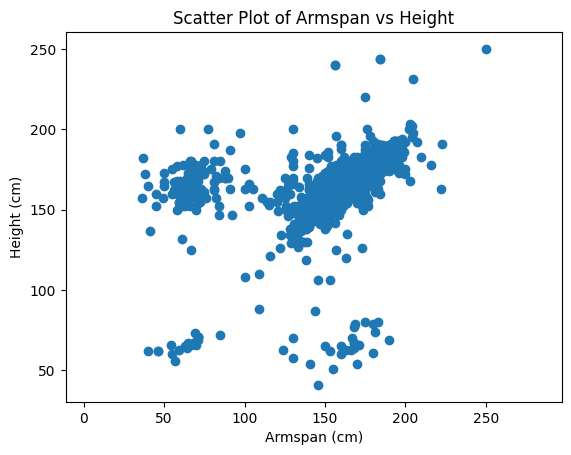

In [5]:
plt.scatter(df_3['Armspan_cm'], df_3['Height_cm'])
plt.xlabel('Armspan (cm)')
plt.ylabel('Height (cm)')
plt.title('Scatter Plot of Armspan vs Height')
plt.axis('equal')  
plt.show()

El diagrama de dispersión tiene una buena correlación lineal positiva, que podríamos enfocar a un modelo de regresión lineal. Sin embargo, puedo observar una correlación negativa "cuadratica" como le llamo yo, es decir, que se pueda enfocar a un modelo de regresión cuadratico, teniendo como negativo el parametro a (es decir, la función cuadratica sea negativa o apunte hacia abajo). Existen algunos datos dispersos, pero una gran mayoría se concentran en los lugares objetivos (planteando que la teoría de da Vinci es cierta, sobre que la longitud de brazos extendidos en "T" sea igual a la altura)

### *b. Según la hipótesis de da Vinci, ¿qué valor debería tener la pendiente de la recta de regresión? Justifique su respuesta.*

El valor que tendría que mx, tomando en cuenta la formula de la pendiente de la forma y = mx+b, debe ser mx>0, o lo que es lo mismo, ser de valores positivos o tener pendiente positiva. Esto, pues vemos que la recta que más puede minimizar el error (tomando como referencia las predicciones), es una recta positiva, ya que hay una mayoría de datos si trazamos esa recta positiva, y la cercanía de los otros datos no se ve tan comprometida, por ende no se podría perder tanta precisión con una recta positiva.

### *c. Determine la ecuación de la recta de regresión para predecir la estatura a partir de la distancia entre brazos. Compare la pendiente obtenida con su respuesta del inciso anterior. ¿Qué puede concluir?*

Coeficiente (pendiente): 0.2771864348331272
Término independiente: 120.46053890408808


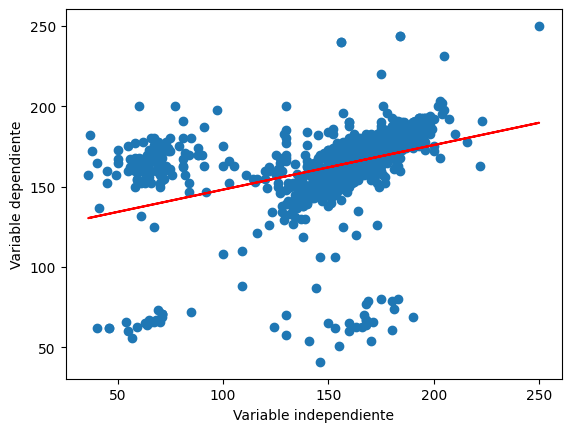

In [6]:
X = df_3['Armspan_cm'].values.reshape(-1, 1)
y = df_3['Height_cm']

modelo = LinearRegression()

modelo.fit(X, y)

predicciones = modelo.predict(X)

# Imprimir coeficiente (pendiente) y término independiente (intercepto)
print("Coeficiente (pendiente):", modelo.coef_[0])
print("Término independiente:", modelo.intercept_)

plt.scatter(df_3['Armspan_cm'], y)
plt.plot(df_3['Armspan_cm'], predicciones, color='red')
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.show()

El modelo de regresión líneal más apróximado es a través de una función con pendiente positiva, tal como lo dije anteriormente. Esto significa, para concluir, que sí hay una buena mayoría de datos apuntando a una pendiente positiva.

### *d. Para una persona con una distancia entre brazos de 65 pulgadas (165,1 céntimetros): ¿Cuál sería su estatura predicha? ¿Cuál es el error estándar de esta predicción? Construya un intervalo de predicción del 95% para esta estatura.*

In [7]:
import numpy as np
from scipy import stats

# Given armspan in cm
armspan = 165.1

# Predict the height
predicted_height = modelo.predict(np.array([[armspan]]))[0]

n = len(X)
mean_x = np.mean(X)
se = np.sqrt(np.sum((y - predicciones) ** 2) / (n - 2)) / np.sqrt(np.sum((X - mean_x) ** 2))

t_value = stats.t.ppf(0.975, df=n-2)
margin_of_error = t_value * se
lower_bound = predicted_height - margin_of_error
upper_bound = predicted_height + margin_of_error

print(f"Predicted height: {predicted_height:.2f} cm")
print(f"Standard error: {se:.2f}")
print(f"95% prediction interval: [{lower_bound:.2f}, {upper_bound:.2f}] cm")

Predicted height: 166.22 cm
Standard error: 0.02
95% prediction interval: [166.19, 166.26] cm


Explicación de la formula utilizada:
* El t_value: Es el estadistico de prueba. Recordemos que los grados de libertad se encuentran de la forma n-1, sin embargo, cuando aplicamos la función len de python, siempre nos da la dimensión de un vector + 1, en ese caso debemos quitar ese 1, por eso ese n-2. También se el 0.975 recordemos que viene del intervalo de predicción, cuando realizamos 1-0.95=0.5 y ese 0.5 lo partimos para el estadistico en 2.5 para cada "cola".

Si bien el modelo predice de una persona que tiene una distancia entre brazos de 65 pulgadas (165,1 céntimetros) es que tiene de largo una altura de 65,4 pulgadas (166,2 céntrimetros).
Como conclusión, se puede mencionar con un 95% de predicción, que para una persona que tiene una distancia entre brazos de 65 pulgadas tiene una altura en un intervalo de 65,4 pulgadas (166,19 céntrimetros) y 65,5 pulgadas (166,26 céntrimetros).

### *e. Realice un análisis de residuos: Grafique los residuos vs valores ajustados ¿Se cumplen los supuestos de linealidad y homocedasticidad? Identifique posibles valores atípicos o influyentes.*

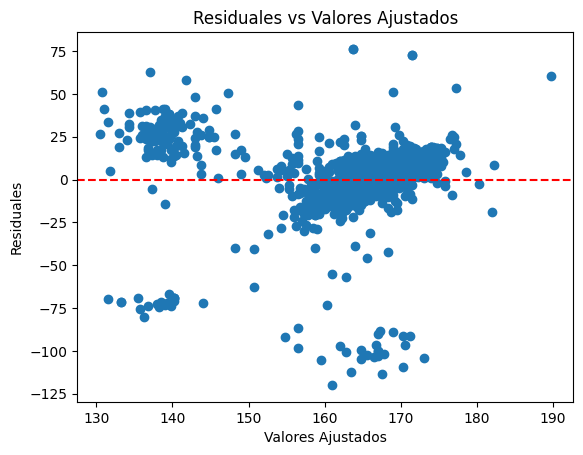

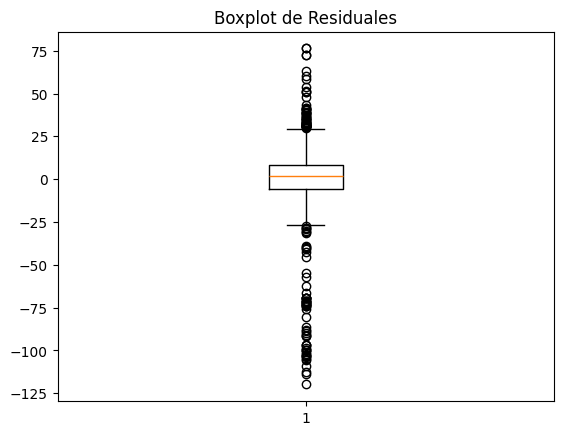

In [8]:
residuals = y - predicciones

plt.scatter(predicciones, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuales')
plt.title('Residuales vs Valores Ajustados')
plt.show()

# Boxplot of residuals
plt.boxplot(residuals)
plt.title('Boxplot de Residuales')
plt.show()

En la gráfica, los puntos parecen estar bastante dispersos, sin un patrón muy evidente en forma de curva. Esto puede sugerir que, en general, el modelo está capturando bien una relación lineal. Sin embargo, puedo notar que en algunas áreas donde los puntos están más agrupados, lo cual podría ser una indicación de que ciertos subconjuntos de datos están influyendo de manera diferente. Aunque esto no es un incumplimiento grave del supuesto de linealidad, puede sugerir que podríamos estar perdiendo algo de información que tal vez un modelo un poco más complejo capturaría mejor.

En cuanto a la homocedasticidad, observando la gráfica, parece que en algunos lugares la dispersión de los puntos (los residuales) es mayor. Por ejemplo, en los extremos de los valores ajustados, algunos puntos parecen alejarse mucho más de la línea roja (que representa un error de cero) que en otras áreas. Esto puede indicar que el modelo tiene problemas para predecir bien en esos rangos y que los errores no son uniformes en toda la gráfica. En términos sencillos (que podría decir yo), significa que el modelo podría estar haciendo un mejor trabajo en algunas partes del rango de valores y un trabajo menos preciso en otras, lo cual es una señal de que el supuesto de homocedasticidad podría no estarse cumpliendo completamente.

Algunos puntos en la gráfica se encuentran muy lejos de la línea de cero, especialmente aquellos con residuales mayores a 25 o menores a -50.
Estos valores atípicos son importantes porque podrían estar influyendo en el ajuste del modelo. A veces, estos puntos extremos pueden “empujar” la línea de regresión en una dirección que no representa bien la mayoría de los datos. Si estos valores atípicos se deben a errores en los datos (por ejemplo, un error de entrada), sería mejor eliminarlos o corregirlos. Si son datos válidos, podría considerar yo, puede ser útil considerar un modelo que trate de una mejor manera estos casos extremos, ya que están afectando los resultados.

### *f. Pruebe la existencia de una relación lineal entre las variables: Plantee las hipótesis nula y alternativa. Use α = 0,05. Interprete el resultado en el contexto del problema.*

In [10]:
# Agregar constante para el término independiente
X_with_constant = sm.add_constant(X)

# Ajustar el modelo
modelo_stats = sm.OLS(y, X_with_constant).fit()

# Resumen del modelo que incluye el p-valor
print(modelo_stats.summary())

                            OLS Regression Results                            
Dep. Variable:              Height_cm   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     278.7
Date:                Sat, 09 Nov 2024   Prob (F-statistic):           1.64e-57
Time:                        17:26:49   Log-Likelihood:                -6663.5
No. Observations:                1500   AIC:                         1.333e+04
Df Residuals:                    1498   BIC:                         1.334e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        120.4605      2.654     45.385      0.0

Paso 1: Hipótesis
Hipótesis Nula (H₀): No existe una relación lineal entre la envergadura (Armspan) y la altura (Height), es decir, el coeficiente de la envergadura es igual a cero (𝛽=0).
Hipótesis Alternativa (H₁): Existe una relación lineal significativa entre la envergadura y la altura, es decir, el coeficiente de la envergadura es diferente de cero (𝛽≠0).

Paso 2: Nivel de Significancia
Se ha establecido un nivel de significancia de 𝛼=0.05.

Paso 3: Resultados de la Prueba
Coeficiente de la envergadura (x1): El coeficiente es 0.2772, lo que significa que, en promedio, por cada centímetro adicional en la envergadura, se espera que la altura aumente en aproximadamente 0.277 cm.
Valor p asociado al coeficiente: El valor p para este coeficiente es 0.000 (en realidad, es menor que cualquier valor reportable), lo cual es mucho menor que 0.05.
F-statistic y su p-valor: El estadístico F es 278.7, con un valor p de 1.64e-57 (un número extremadamente bajo).

Conclusión
Dado que el p-valor del coeficiente de la envergadura es menor que 0.05, **rechazamos la hipótesis nula**. Esto significa que tenemos evidencia estadística suficiente para afirmar que existe una relación lineal significativa entre la envergadura y la altura en estos datos, con un nivel de confianza del 95%.

En términos prácticos, esto sugiere que la envergadura puede ser un predictor útil de la altura en esta muestra de datos, por lo menos en el intervalo que definimos.

### *g. Para la pendiente de la recta de regresión: Construya un intervalo de confianza del 95% ¿Este intervalo contiene el valor teórico según la hipótesis de da Vinci? ¿Qué implica esto sobre la validez de la hipótesis?*

Leonardo da Vinci propuso que la relación entre la envergadura de una persona y su altura es aproximadamente de 1:1, es decir, la pendiente de una línea que relacione estas dos variables debería ser cercana a **1**, tomando en cuenta un analisis de "correlación".

Para verificar esta hipótesis, construimos un intervalo de confianza al 95% para la pendiente en nuestro modelo de regresión. A partir del resumen del modelo, sabemos que:
- La pendiente estimada es **0.2772**.
- El error estándar de esta pendiente es **0.017**.

Para calcular el intervalo de confianza, utilizamos esta fórmula:

Intervalo de confianza = pendiente estimada ± t_α/2 × error estándar

Aplicando la formula a nuestros datos sería:

Intervalo de confianza=0.2772±1.96×0.017

Lo anterior da como resultado:

\[
Intervalo de confianza = [0.24388, 0.31052]
\]

El intervalo de confianza del 95% para la pendiente es **[0.24388, 0.31052]**. Este intervalo **no contiene el valor 1** que la hipótesis de da Vinci sugiere.

La hipótesis de da Vinci propone que la envergadura y la altura deberían estar en una proporción de 1:1 (pendiente = 1). Sin embargo, el intervalo de confianza calculado nos indica que la pendiente real en nuestros datos está lejos de 1.

Esto implica que, en este conjunto de datos, **la hipótesis de da Vinci no se sostiene**. En otras palabras, la envergadura no es un predictor perfecto de la altura en una relación 1:1.


### *h. Calcule e interprete: El coeficiente de correlación r. El coeficiente de determinación R^2. ¿Qué nos dicen estos valores sobre la fortaleza de la relación?*

In [13]:
r_squared = r2_score(y, predicciones)

r = np.sqrt(r_squared)

print(f"Coeficiente de correlación (r): {r:.4f}")
print(f"Coeficiente de determinación (R^2): {r_squared:.4f}")

Coeficiente de correlación (r): 0.3961
Coeficiente de determinación (R^2): 0.1569


Podemos observar que, la distancia entre los brazos extendidos horizontalmente (formando una “T” con el cuerpo) es aproximadamente igual a la estatura de la persona **NO** tiene buena correlación, es decir, la relación no es tan fuerte (según el coeficiente de correlación r). También, según el Coeficiente de determinación R^2 nos dice que apróximadamente el 39.61% de la altura de las personas se debe a la distancia entre los brazos extendidos horizontalmente (formando una “T” con el cuerpo). 

Como conclusión, lo anterior quiere decir que el modelo no puede predecir de forma precisa la estatura de una persona a partir de la distancia entre los brazos extendidos de esa persona.

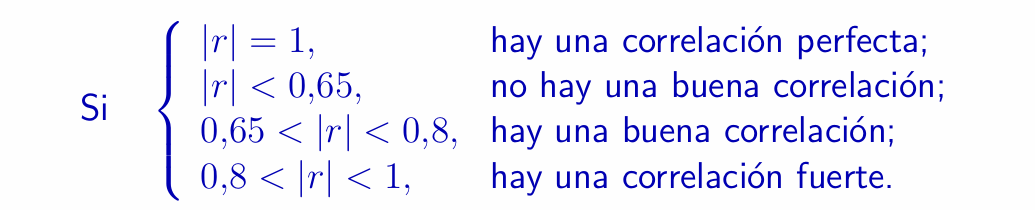

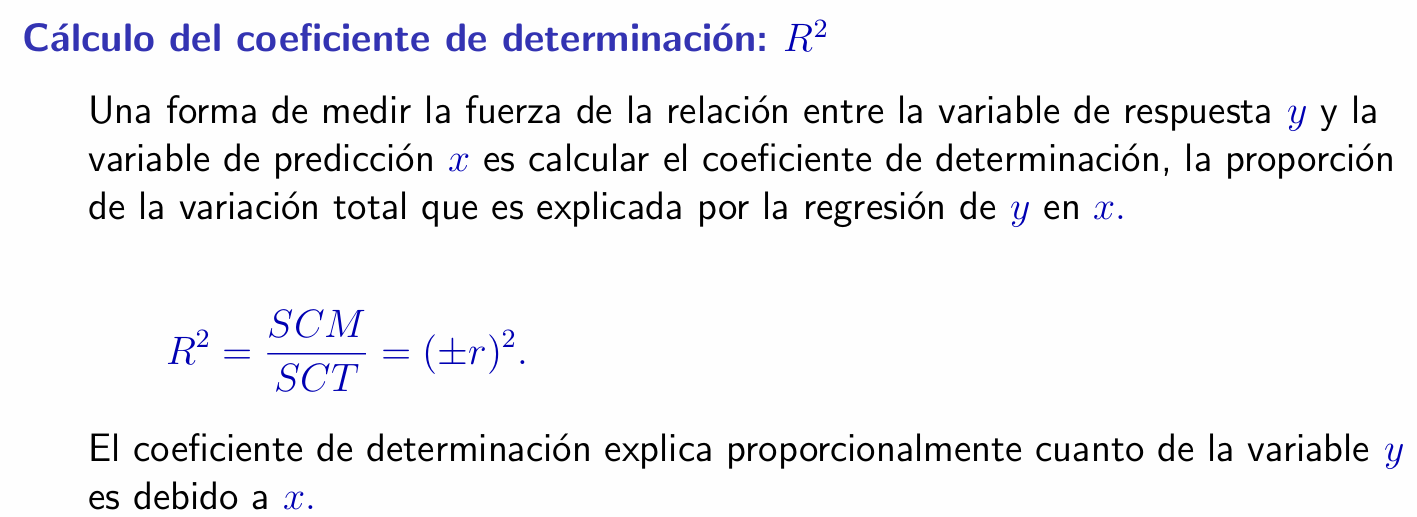